# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from pandas.tseries.offsets import BDay
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
#Set path to local .env file
dotenv = Path("../../../.env")

# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv(dotenv)

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19076181,
            "id": 1,
            "last_updated": 1656111241,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 407362229694,
                    "percent_change_1h": 0.184295578971462,
                    "percent_change_24h": 1.4257025334743,
                    "percent_change_7d": 4.73915361347745,
                    "percentage_change_1h": 0.184295578971462,
                    "percentage_change_24h": 1.4257025334743,
                    "percentage_change_7d": 4.73915361347745,
                    "price": 21376.0,
                    "volume_24h": 22170123302
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19076181,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 121291811,
            "id": 1027,
            "last_updated": 1656111244,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 149792337953,
                    "percent_change_1h": 0.844143295667385,
                    "percent_change_24h": 8.04542384589629,
                    "percent_change_7d": 15.6543287491062,
                    "percentage_change_1h": 0.844143295667385,
                    "percentage_change_24h": 8.04542384589629,
                    "percentage_change_7d": 15.6543287491062,
                    "price": 1235.89,
                    "volume_24h": 16335741120
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 121291811,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
btc_price


21376.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
eth_price

1235.89

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value

25651.2

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value

6550.217000000001

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet


32201.417

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

print(type(alpaca_api_key), type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


<class 'str'> <class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ['AGG','SPY']

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

start_date = pd.Timestamp('now', tz="America/New_York") - BDay(1)
start_date = start_date.normalize().isoformat()
end_date = start_date

#check dates
print(start_date, end_date)


2022-06-23T00:00:00-04:00 2022-06-23T00:00:00-04:00


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = portfolio_df[portfolio_df['symbol'] == 'AGG'].drop('symbol',axis=1)
SPY = portfolio_df[portfolio_df['symbol'] == 'SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

portfolio_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
portfolio_df.head()


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2022-06-23 04:00:00+00:00  101.25  101.76  101.125  101.21  7760715   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-23 04:00:00+00:00       25697  101.363615  376.69  378.83  372.89   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-23 04:00:00+00:00  378.06  78643521      623105  376.219755

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df['AGG']['close'])

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price


101.21

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'])

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

378.06

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value


20242.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value


41586.6

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds


61828.6

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio


94030.01699999999

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = (total_crypto_wallet, total_stocks_bonds)

# Review the Python list savings_data
# YOUR CODE HERE
savings_data
    

(32201.417, 61828.6)

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [46]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(
    savings_data, 
    index=["Crypto","Stocks and Bonds"], 
    columns=["Amount"]
)

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df


,Amount
Crypto,32201.417
Stocks and Bonds,61828.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Value of Portfolio: $94030.01699999999'}>

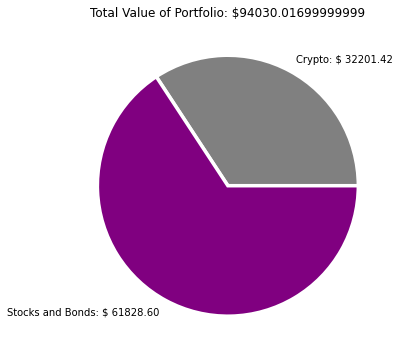

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

labels = [f'{savings_df.index[0]}: ${savings_df.iloc[0][0]: .2f}', f'{savings_df.index[1]}: ${savings_df.iloc[1][0]: .2f}']
colors = ['grey','purple']

savings_df.plot(
    kind='pie', 
    y="Amount", 
    title=f"Total Value of Portfolio: ${total_portfolio}", 
    legend=False, 
    labels=labels,
    ylabel='',
    figsize=(6,6),
    colors=colors,
    wedgeprops={'linewidth': 3.5, 'edgecolor': 'white'}
)


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3
emergency_fund_value 

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE

def emergency_portfolio_check(total_portfolio, emergency_fund_value):
    if total_portfolio > emergency_fund_value:
        print("Congratulations! Your portfolio balance is funded with more than 3 times your monthly income, which should set you in a good financial position to cover most emergencies!")
    
    elif total_portfolio == emergency_fund_value:
         print("Congratulations! Your balance is now 3 times your monthly income, which is a good buffer to cover most emergencies.")
                
    else:
        funding_deficit = emergency_fund_value - total_portfolio
        print(f"You are ${funding_deficit: .2f} away from your recommended emergency savings goal.")

emergency_portfolio_check(total_portfolio,emergency_fund_value)        



Congratulations! Your portfolio balance is funded with more than 3 times your monthly income, which should set you in a good financial position to cover most emergencies!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

end_date = pd.Timestamp('now', tz="America/New_York")- BDay(1)
start_date = end_date - pd.offsets.DateOffset(years=3)

start_date = start_date.normalize().isoformat()
end_date = end_date.normalize().isoformat()

# check dates
print(start_date, end_date)


2019-06-23T00:00:00-04:00 2022-06-23T00:00:00-04:00


In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

hist_pricing_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

AGG = hist_pricing_data[hist_pricing_data['symbol'] == 'AGG'].drop('symbol',axis=1)
SPY = hist_pricing_data[hist_pricing_data['symbol'] == 'SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

hist_pricing_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE

display(hist_pricing_data.head())
display(hist_pricing_data.tail())


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-06-24 04:00:00+00:00  111.23  111.3766  111.2200  111.32  3079794   
2019-06-25 04:00:00+00:00  111.36  111.4400  111.2200  111.34  3111092   
2019-06-26 04:00:00+00:00  111.29  111.3100  111.0600  111.09  3703224   
2019-06-27 04:00:00+00:00  111.25  111.4100  111.1633  111.40  2963646   
2019-06-28 04:00:00+00:00  111.36  111.4684  111.3200  111.35  9887791   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2019-06-24 04:00:00+00:00       16767  111.300802  294.18  294.58  293.470   
2019-06-25 04:00:00+00:00       14344  111.364505  293.67  293.73  290.640   
2019-06-26 04:00:00+00:00       13654  111.151757  291.78  292.31  290.345   
2019-06-27 04:00:00+00:00       14735  111.338162  291.29  292.06  290.890   
2019-06-28 04:00:00+00:00       19668  111.395360  292.57  293.55  292.010   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-06-24 04:00:00+00:00  293.64  47610730      203286  293.971447  
2019-06-25 04:00:00+00:00  290.76  82344336      301447  292.000459  
2019-06-26 04:00:00+00:00  290.47  52064906      226135  291.035618  
2019-06-27 04:00:00+00:00  291.50  40484164      185583  291.584832  
2019-06-28 04:00:00+00:00  293.00  59508955      246484  292.797839

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-06-16 04:00:00+00:00   99.24  100.3600   99.1432  100.35  9328681   
2022-06-17 04:00:00+00:00  100.42  100.5700   99.9800  100.34  9891839   
2022-06-21 04:00:00+00:00  100.02  100.2600   99.7900   99.94  7769462   
2022-06-22 04:00:00+00:00  100.67  100.9296  100.6650  100.79  9430887   
2022-06-23 04:00:00+00:00  101.25  101.7600  101.1250  101.21  7760715   

                                                      SPY                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-06-16 04:00:00+00:00       33998   99.905633  370.54  370.940  364.0799   
2022-06-17 04:00:00+00:00       26374  100.372650  365.43  369.380  362.1700   
2022-06-21 04:00:00+00:00       24356   99.992280  371.90  376.525  371.8100   
2022-06-22 04:00:00+00:00       30103  100.802688  370.68  378.720  370.1800   
2022-06-23 04:00:00+00:00       25697  101.363615  376.69  378.830  372.8900   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-06-16 04:00:00+00:00  366.65  134508514      906307  368.466260  
2022-06-17 04:00:00+00:00  365.86  109255759      821350  366.263193  
2022-06-21 04:00:00+00:00  375.07   76966205      578265  374.376305  
2022-06-22 04:00:00+00:00  374.39   89625876      604343  375.146941  
2022-06-23 04:00:00+00:00  378.06   78643521      623105  376.219755

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

mc_simulation_30 = MCSimulation(
    portfolio_data = hist_pricing_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days= 252 * 30
)


# Review the simulation input data
# YOUR CODE HERE
mc_simulation_30.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-06-24 04:00:00+00:00  111.23  111.3766  111.2200  111.32  3079794   
2019-06-25 04:00:00+00:00  111.36  111.4400  111.2200  111.34  3111092   
2019-06-26 04:00:00+00:00  111.29  111.3100  111.0600  111.09  3703224   
2019-06-27 04:00:00+00:00  111.25  111.4100  111.1633  111.40  2963646   
2019-06-28 04:00:00+00:00  111.36  111.4684  111.3200  111.35  9887791   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00       16767  111.300802          NaN  294.18   
2019-06-25 04:00:00+00:00       14344  111.364505     0.000180  293.67   
2019-06-26 04:00:00+00:00       13654  111.151757    -0.002245  291.78   
2019-06-27 04:00:00+00:00       14735  111.338162     0.002791  291.29   
2019-06-28 04:00:00+00:00       19668  111.395360    -0.000449  292.57   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2019-06-24 04:00:00+00:00  294.58  293.470  293.64  47610730      203286   
2019-06-25 04:00:00+00:00  293.73  290.640  290.76  82344336      301447   
2019-06-26 04:00:00+00:00  292.31  290.345  290.47  52064906      226135   
2019-06-27 04:00:00+00:00  292.06  290.890  291.50  40484164      185583   
2019-06-28 04:00:00+00:00  293.55  292.010  293.00  59508955      246484   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  293.971447          NaN  
2019-06-25 04:00:00+00:00  292.000459    -0.009808  
2019-06-26 04:00:00+00:00  291.035618    -0.000997  
2019-06-27 04:00:00+00:00  291.584832     0.003546  
2019-06-28 04:00:00+00:00  292.797839     0.005146

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

mc_simulation_30.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tonin\OneDrive\Fintech-Workspace\fintechbootcamp\Module_5_Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992775,1.005360,1.009193,1.012341,1.003143,1.003602,0.999896,0.994145,0.998135,1.009003,...,0.997752,0.986889,1.013296,0.988544,0.997284,0.992158,0.994745,1.003172,1.017598,0.990130
2,1.008237,1.021142,1.004669,1.015990,1.015679,1.006258,0.995177,0.986213,0.989964,1.013733,...,0.987307,0.987166,1.008203,0.984837,0.987577,1.000522,0.994004,1.003892,1.025187,0.983476
3,1.014893,1.021029,1.002298,1.004957,1.005113,1.017102,1.002755,0.979199,0.994901,1.007858,...,0.994630,0.977524,1.004841,0.987909,1.002847,0.991059,0.998826,1.004629,1.040524,0.993900
4,0.999891,1.036934,1.005739,1.011049,0.992677,1.005348,1.006308,0.973122,0.994438,1.001828,...,0.989985,0.976724,1.002649,0.992438,0.997251,1.007284,1.002352,0.997058,1.023938,0.982905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.166218,3.363535,12.229407,3.912074,3.420358,5.436207,3.079739,3.220288,3.198615,0.953407,...,2.102707,11.432413,6.683648,3.997931,7.086733,1.444245,2.776027,1.549018,4.345011,2.139798
7557,5.215122,3.381426,12.113085,3.954484,3.440595,5.471983,3.079993,3.211266,3.215361,0.947762,...,2.081937,11.475731,6.670647,3.966596,7.138006,1.433123,2.784343,1.562218,4.327271,2.161772
7558,5.250213,3.331037,12.038434,3.937568,3.492907,5.452622,3.153382,3.243766,3.181593,0.954565,...,2.089368,11.428468,6.652826,3.944982,7.108364,1.430015,2.818461,1.576409,4.329429,2.117313
7559,5.179964,3.335204,12.243580,3.923673,3.489932,5.483912,3.135666,3.240256,3.106972,0.947526,...,2.136340,11.360853,6.611936,3.948533,7.017564,1.435837,2.811103,1.561387,4.406770,2.075826


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

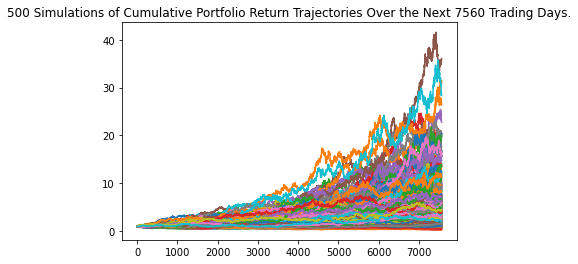

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

mc_simulation_30.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

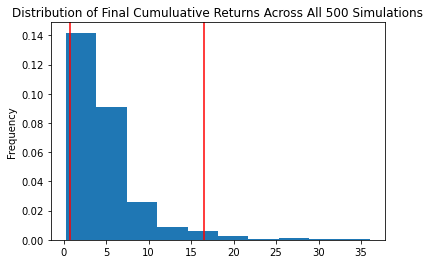

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_simulation_30.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_summary_30 = mc_simulation_30.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_summary_30

count           500.000000
mean              4.999363
std               4.366958
min               0.268246
25%               2.165834
50%               3.824287
75%               6.419480
max              36.076203
95% CI Lower      0.819043
95% CI Upper     16.566685
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds


61828.6

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_summary_30[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_summary_30[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
f"Based on historical data, your current portfolio of ${total_stocks_bonds} is 95% likely to be worth between ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f} in 30 years' time."


"Based on historical data, your current portfolio of $61828.6 is 95% likely to be worth between $ 50640.25 and $ 1024294.93 in 30 years' time."

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

mc_simulation_10 = MCSimulation(
    portfolio_data=hist_pricing_data,
    weights=[0.2,0.8],
    num_simulation=500,
    num_trading_days= 252 * 10
)

# Review the simulation input data
# YOUR CODE HERE

mc_simulation_10.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-06-24 04:00:00+00:00  111.23  111.3766  111.2200  111.32  3079794   
2019-06-25 04:00:00+00:00  111.36  111.4400  111.2200  111.34  3111092   
2019-06-26 04:00:00+00:00  111.29  111.3100  111.0600  111.09  3703224   
2019-06-27 04:00:00+00:00  111.25  111.4100  111.1633  111.40  2963646   
2019-06-28 04:00:00+00:00  111.36  111.4684  111.3200  111.35  9887791   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00       16767  111.300802          NaN  294.18   
2019-06-25 04:00:00+00:00       14344  111.364505     0.000180  293.67   
2019-06-26 04:00:00+00:00       13654  111.151757    -0.002245  291.78   
2019-06-27 04:00:00+00:00       14735  111.338162     0.002791  291.29   
2019-06-28 04:00:00+00:00       19668  111.395360    -0.000449  292.57   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2019-06-24 04:00:00+00:00  294.58  293.470  293.64  47610730      203286   
2019-06-25 04:00:00+00:00  293.73  290.640  290.76  82344336      301447   
2019-06-26 04:00:00+00:00  292.31  290.345  290.47  52064906      226135   
2019-06-27 04:00:00+00:00  292.06  290.890  291.50  40484164      185583   
2019-06-28 04:00:00+00:00  293.55  292.010  293.00  59508955      246484   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  293.971447          NaN  
2019-06-25 04:00:00+00:00  292.000459    -0.009808  
2019-06-26 04:00:00+00:00  291.035618    -0.000997  
2019-06-27 04:00:00+00:00  291.584832     0.003546  
2019-06-28 04:00:00+00:00  292.797839     0.005146

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

mc_simulation_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tonin\OneDrive\Fintech-Workspace\fintechbootcamp\Module_5_Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001399,0.993345,0.989656,0.992246,0.991508,1.001751,0.980880,1.016263,1.011144,1.014682,...,0.991649,0.989438,0.987514,1.006093,1.016740,0.997359,1.006785,1.000927,0.985600,1.024861
2,0.998942,0.989403,0.986331,0.992430,0.972966,1.005943,0.990686,1.011955,1.033669,1.038770,...,0.984375,0.990917,0.965708,1.013730,0.998548,0.977539,1.014116,1.004487,0.976397,1.024370
3,0.984401,1.000811,0.968108,1.012819,0.981725,0.989643,0.980045,1.004397,1.018860,1.032536,...,0.977503,0.978726,0.982517,1.021778,0.999786,0.969002,1.022849,1.014826,0.947586,1.022906
4,0.991433,0.991467,0.979399,1.012938,0.977159,0.990690,0.959427,1.004306,1.001937,1.032426,...,0.989241,0.988173,0.988121,1.031995,1.008008,0.960388,1.017959,1.035332,0.950185,1.024844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.375701,1.557354,2.808058,3.519771,1.845342,4.383930,1.981701,1.751131,0.939452,2.248443,...,5.169850,3.426049,1.103270,1.933519,2.036369,3.450813,2.642286,3.430850,3.283669,0.884064
2517,0.375937,1.554675,2.864195,3.548643,1.807908,4.466043,1.983651,1.764143,0.929709,2.250140,...,5.183358,3.430175,1.122203,1.960793,2.008164,3.499569,2.690698,3.348312,3.293804,0.884898
2518,0.377725,1.570533,2.848727,3.551159,1.821034,4.422782,1.966622,1.763785,0.920711,2.269224,...,5.222707,3.474447,1.135003,1.964626,2.006172,3.405175,2.675870,3.313801,3.329921,0.888914
2519,0.380714,1.570116,2.848276,3.562208,1.821494,4.376702,1.989407,1.750013,0.923556,2.283602,...,5.236594,3.426294,1.105801,1.961020,2.020482,3.355223,2.674868,3.314396,3.338481,0.878972


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

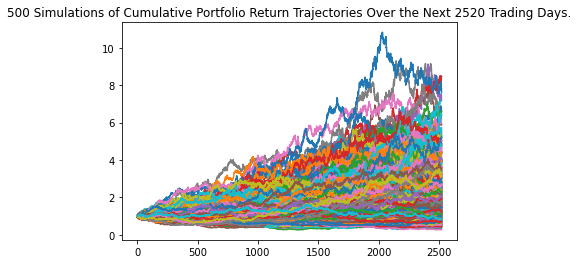

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

mc_simulation_10.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

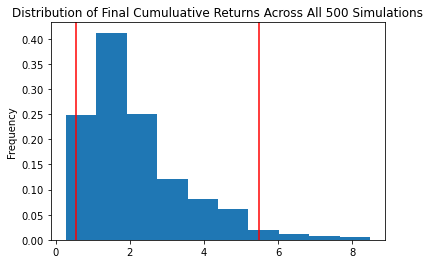

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

mc_simulation_10.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_summary_10 = mc_simulation_10.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_summary_10

count           500.000000
mean              2.163249
std               1.361011
min               0.271954
25%               1.187832
50%               1.818390
75%               2.749619
max               8.477585
95% CI Lower      0.539212
95% CI Upper      5.491201
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds


61828.6

In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_summary_10[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_summary_10[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
f"Based on historical data, your current portfolio of ${total_stocks_bonds} is 95% likely to be worth between ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f} in 30 years' time."



"Based on historical data, your current portfolio of $61828.6 is 95% likely to be worth between $ 33338.72 and $ 339513.28 in 30 years' time."

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?